This notebook shows how to numerically calculate and visualise the fields around an electrostatic dipole It makes use of the superposition of the fields of 2 charged conducting spheres (to avoid divergence at core of charge cloud).

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xpoints=256 #nr of grid points in 1 direction
xmax=1 #extension of grid [m]
pref=9e9 # 1/(4pi eps0)
x=np.linspace(-xmax,xmax,xpoints)
y=x
[x2d,y2d]=np.meshgrid(x,y) #2D matrices holding x or y coordinate for each point on the grid
r=np.sqrt(np.square(x2d)+np.square(y2d))

In [3]:
#sphere 1
q=1e-10 #charge on spheres [C]
radius=0.2*xmax #radius of spheres [m]
q1=q #charge on sphere 1 [C]
x1=-0.5*xmax #x position of sphere 1 [m]
y1=0 #y position of sphere 1[m]

r1=np.sqrt(np.square(x2d-x1)+np.square(y2d-y1)) #distance to charge 1
in1=r1<radius  #logical function 1 if inside sphere, 0 if outside
out1=r1>=radius #logical function 0 if inside sphere, 1 if outside

e1x=pref*q1*np.divide(x2d-x1,np.power(r1,3)) #x component of E field valid outside sphere
e1y=pref*q1*np.divide(y2d-y1,np.power(r1,3)) #y component of E field valid outside sphere
#note that we don't need the z component here as we will be looking in a plane where ez=0, for a generic 3d position you need to calculate ez as well
v1=pref*q1*np.divide(np.ones(r1.shape),r1) # potential 1/r valid outside sphere

#sphere 2
q2=-q #charge on sphere 2 [C]
x2=0.5*xmax #x position of sphere 2 [m]
y2=0 #y position of sphere 2[m]

r2=np.sqrt(np.square(x2d-x2)+np.square(y2d-y2)) #distance to charge 1
in2=r2<radius  #logical function 1 if inside sphere, 0 if outside
out2=r2>=radius #logical function 0 if inside sphere, 1 if outside

e2x=pref*q2*np.divide(x2d-x2,np.power(r2,3)) #x component of E field valid outside sphere
e2y=pref*q2*np.divide(y2d-y2,np.power(r2,3)) #y component of E field valid outside sphere
#note that we don't need the z component here as we will be looking in a plane where ez=0, for a generic 3d position you need to calculate ez as well
v2=pref*q2*np.divide(np.ones(r2.shape),r2) # potential 1/r valid outside sphere

In [4]:
ex=np.multiply(e1x+e2x,np.multiply(out1,out2)) #E field only if outside both spheres (multiplying with out1 and out2 results in nonzero only outside spheres), inside sphere E=0 because conductor [V/m]
ey=np.multiply(e1y+e2y,np.multiply(out1,out2))
e=np.sqrt(np.square(ex)+np.square(ey)) #and size of E
v=np.multiply(v1+v2,np.multiply(out1,out2))+in1*pref*q1/radius+in2*pref*q2/radius #potential, inside spheres is constant (conductors)

In [5]:
px=q*(x1-x2) #x component of dipole moment [Cm]
py=q*(y1-y2) #y component of dipole moment [Cm]
vdip=pref*np.divide(px*x2d+py*y2d,np.power(r,3))
exdip=-pref*(px*np.power(r,-3)-3*np.multiply(np.multiply(px*x2d+py*y2d,x2d),np.power(r,-5)))
eydip=-pref*(py*np.power(r,-3)-3*np.multiply(np.multiply(px*x2d+py*y2d,y2d),np.power(r,-5)))
edip=np.sqrt(np.square(exdip)+np.square(eydip))

(-1.0901960784313727,
 1.0666666666666669,
 -1.0901960784313727,
 1.0666666666666669)

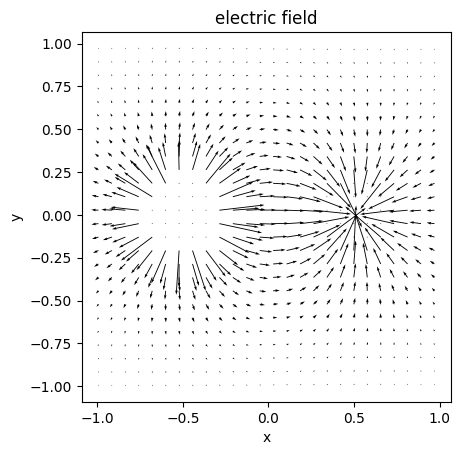

In [6]:
#show vector plot, but limit number of points to keep the number of vector reasonable
scale=1
nsteps=25 #total number of vector points in each direction
step=round(xpoints/nsteps)
plt.quiver(x2d[1:xpoints:step,1:xpoints:step],y2d[1:xpoints:step,1:xpoints:step],ex[1:xpoints:step,1:xpoints:step],ey[1:xpoints:step,1:xpoints:step])
plt.title('electric field')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

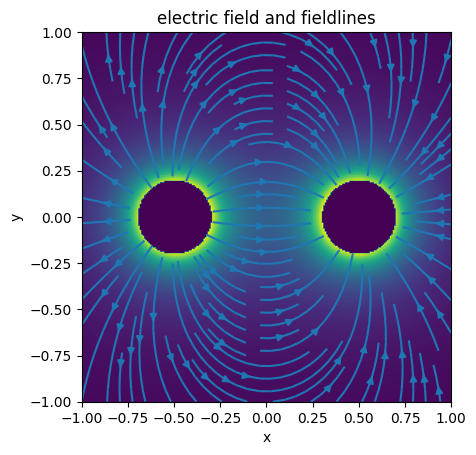

In [8]:
plt.imshow(e,extent=[-xmax, xmax, -xmax, xmax])
plt.title('electric field and fieldlines')
plt.xlabel('x');
plt.ylabel('y');
plt.streamplot(x2d,y2d,ex,ey)
plt.axis('square')
plt.colorbar
plt.show()

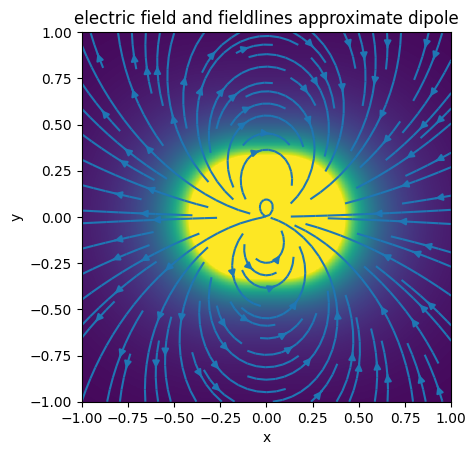

In [9]:
plt.imshow(edip,extent=[-xmax, xmax, -xmax, xmax],vmin=np.min(e),vmax=np.max(e)) #scale color to same as real dipole to allow comparison
plt.title('electric field and fieldlines approximate dipole')
plt.xlabel('x')
plt.ylabel('y')
plt.streamplot(x2d,y2d,exdip,eydip)
plt.axis('square')
plt.colorbar
plt.show()

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kwargs)>

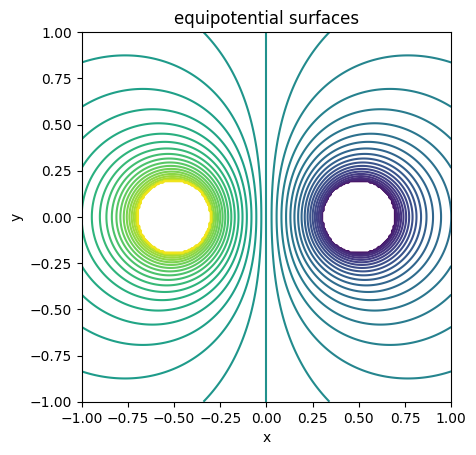

In [10]:
nlines=50;
plt.contour(x2d,y2d,v,nlines)
plt.title('equipotential surfaces')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.colorbar